<a href="https://colab.research.google.com/github/sarjakpatel/SJSU/blob/main/CMPE%20255/Assignment%201/DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CMPE-255 Data Cleaning Assignment**

### **Importing the Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

### **Reading the Dataset**

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/vehicles.csv')
dataset.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
5,7222379453,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
6,7221952215,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7,7220195662,https://hudsonvalley.craigslist.org/cto/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
8,7209064557,https://medford.craigslist.org/cto/d/grants-pa...,medford-ashland,https://medford.craigslist.org,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or,NaN,NaN,NaN
9,7219485069,https://erie.craigslist.org/cto/d/erie-2012-su...,erie,https://erie.craigslist.org,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa,NaN,NaN,NaN


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

 **Null %(Percentage) values of each column in dataset** 

In [4]:
dataset.isnull().sum()*100/len(dataset)

id                0.000000
url               0.000000
region            0.000000
region_url        0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
VIN              37.725356
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
image_url         0.015930
description       0.016398
county          100.000000
state             0.000000
lat               1.534155
long              1.534155
posting_date      0.015930
dtype: float64

In [5]:
dataset.shape

(426880, 26)

### **Data Cleaning**

**Remove the duplicates rows**

In [6]:
dataset = dataset.drop_duplicates()

**posting_date, region_url, url, image_url, VIN, size, id, county, description columns are not useful to predict cars price so we simply remove those columns.**

In [7]:
dataset=dataset.drop(['posting_date','region_url', 'url','image_url','VIN','size','id','county','description'] , axis=1)

In [8]:
dataset.shape

(426880, 17)

In [9]:
dataset.isnull().sum()*100/len(dataset)

region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
drive           30.586347
type            21.752717
paint_color     30.501078
state            0.000000
lat              1.534155
long             1.534155
dtype: float64

**Removing the rows in which more than 14 columns have null values.**

In [10]:
dataset=dataset.dropna(thresh = 14, axis = 0)

In [11]:
dataset.isnull().sum()

region               0
price                0
year               526
manufacturer     10972
model             2878
condition       114154
cylinders       113582
fuel              1279
odometer          2554
title_status      6265
transmission       776
drive            70219
type             35406
paint_color      69828
state                0
lat               5116
long              5116
dtype: int64

In [12]:
dataset.shape

(359916, 17)

**We can't get the null values of latitude and longitude from other columns, So we simply remove the null values.**

In [13]:
dataset = dataset.dropna(subset=['lat','long'])

In [14]:
dataset.isna().sum()

region               0
price                0
year               526
manufacturer     10955
model             2874
condition       109865
cylinders       113569
fuel              1279
odometer          2554
title_status      6265
transmission       776
drive            70005
type             35390
paint_color      69818
state                0
lat                  0
long                 0
dtype: int64

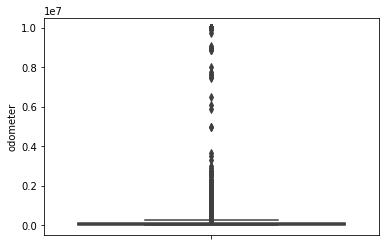

In [15]:
sns.boxplot(y=dataset.odometer )

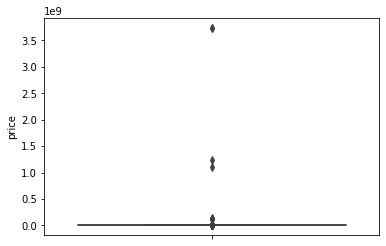

In [16]:
sns.boxplot(y=dataset.price )

**As from the above box plots, we can see that there are outliers present in the odometer and price columns. So, We simply have to remove those outliers.**

In [17]:
#here second hand car price can't be zero, and we have to remove those outliers.
dataset = dataset.drop(dataset[dataset["price"]==0.0].index)

In [18]:
dataset=dataset[(dataset.price < dataset.price.quantile(.995)) & (dataset.price > dataset.price.quantile(.005))]

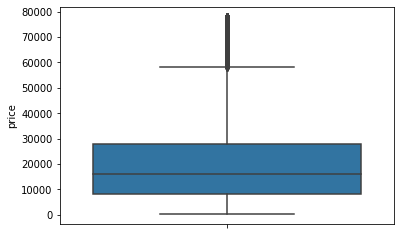

In [19]:
sns.boxplot(y=dataset.price )

In [20]:
#second hand car can't have zero odometer value, So we have to remove those outliers.
dataset = dataset.drop(dataset[dataset["odometer"]==0.0].index)

In [21]:
dataset = dataset[(dataset.odometer<dataset.odometer.quantile(.995))& (dataset.odometer>dataset.odometer.quantile(.005))]

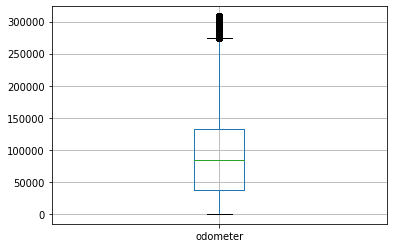

In [22]:
dataset.boxplot('odometer')

In [23]:
dataset.isna().sum()

region               0
price                0
year               466
manufacturer      9706
model             2345
condition        93071
cylinders       100509
fuel              1239
odometer             0
title_status      5757
transmission       692
drive            64718
type             31845
paint_color      59938
state                0
lat                  0
long                 0
dtype: int64

  **Filling the null values of fuel with the most frequent value of the  column.**

In [24]:
dataset.fuel.value_counts()

gas         270389
other        25745
diesel       18901
hybrid        4170
electric      1412
Name: fuel, dtype: int64

In [25]:
dataset['fuel'] = dataset['fuel'].fillna(value='gas') # here most frequent value is gas 

In [26]:
dataset.isna().sum()

region               0
price                0
year               466
manufacturer      9706
model             2345
condition        93071
cylinders       100509
fuel                 0
odometer             0
title_status      5757
transmission       692
drive            64718
type             31845
paint_color      59938
state                0
lat                  0
long                 0
dtype: int64


**Filling the null values of Transmission with the most frequent value of the transmission column.**





In [27]:
dataset['transmission'].value_counts()

automatic    243505
other         59636
manual        18023
Name: transmission, dtype: int64

In [28]:
dataset['transmission'] = dataset['transmission'].fillna(value='automatic') # here most frequent value is automatic

In [29]:
dataset.isna().sum()

region               0
price                0
year               466
manufacturer      9706
model             2345
condition        93071
cylinders       100509
fuel                 0
odometer             0
title_status      5757
transmission         0
drive            64718
type             31845
paint_color      59938
state                0
lat                  0
long                 0
dtype: int64

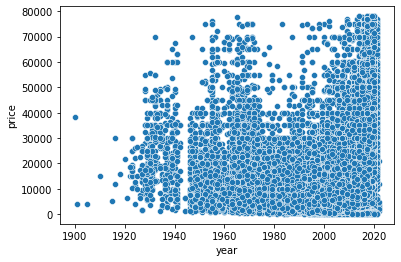

In [30]:
bx = sns.scatterplot(x="year", y="price", data=dataset)

**As from the above scatter plot we can see that there are very less cars which are manufactured before 1920 which would be considered as outliers, so we simply remove those outliers from the dataset.**

In [31]:
dataset = dataset[(dataset['year']>1920)]

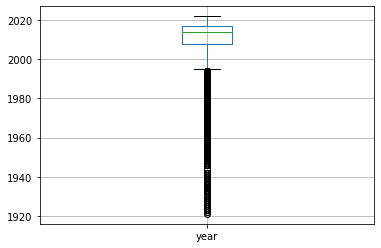

In [32]:
dataset.boxplot('year')

**Filling the null values of Year column with the mean value of the year.**

In [33]:
dataset['year']=dataset['year'].fillna(value = float(round(dataset.year.mean())))

In [34]:
dataset.isna().sum()*100/len(dataset)

region           0.000000
price            0.000000
year             0.000000
manufacturer     2.875092
model            0.729352
condition       28.814709
cylinders       31.274095
fuel             0.000000
odometer         0.000000
title_status     1.791332
transmission     0.000000
drive           20.136847
type             9.908178
paint_color     18.649827
state            0.000000
lat              0.000000
long             0.000000
dtype: float64

**As model, title_status, manufacture and type columns have null values which is less then the 10% of the dataset, we can simply remove those rows.** 

In [35]:
dataset=dataset.dropna(subset=['model','title_status','manufacturer','type'])

In [36]:
dataset.isna().sum()*100/len(dataset)

region           0.000000
price            0.000000
year             0.000000
manufacturer     0.000000
model            0.000000
condition       30.125358
cylinders       32.483722
fuel             0.000000
odometer         0.000000
title_status     0.000000
transmission     0.000000
drive           19.345098
type             0.000000
paint_color     15.542687
state            0.000000
lat              0.000000
long             0.000000
dtype: float64

**Data Cleaning for cylinders Column:**

Here, I can see that cylinder column type is object, So I got the numeric value of cylinders and then convert the column datatype to numeric and then handle the null values using forward fill method.

In [37]:
dataset.cylinders.dtype # here the cylinder column type is object, So we need to convert into numerical value.

dtype('O')

In [38]:
dataset.cylinders.value_counts()

6 cylinders     72010
4 cylinders     58202
8 cylinders     51240
5 cylinders      1294
10 cylinders      818
other             635
3 cylinders       399
12 cylinders       84
Name: cylinders, dtype: int64

In [39]:
dataset.cylinders = dataset.cylinders.apply(lambda x : str(x).replace('cylinders','').strip())

In [40]:
dataset.cylinders.value_counts()

nan      88855
6        72010
4        58202
8        51240
5         1294
10         818
other      635
3          399
12          84
Name: cylinders, dtype: int64

In [41]:
dataset.cylinders = pd.to_numeric(dataset.cylinders, errors = 'coerce')

In [42]:
dataset['cylinders'] = dataset['cylinders'].fillna(method='ffill') # filling the missing value using forward fill method

In [43]:
dataset.cylinders.value_counts()

6.0     111723
4.0      81024
8.0      77217
5.0       1815
10.0      1107
3.0        535
12.0       116
Name: cylinders, dtype: int64

In [44]:
dataset.isna().sum()

region              0
price               0
year                0
manufacturer        0
model               0
condition       82404
cylinders           0
fuel                0
odometer            0
title_status        0
transmission        0
drive           52916
type                0
paint_color     42515
state               0
lat                 0
long                0
dtype: int64

**Data Cleaning for Condition Column:**

At First, I calculated the mean odometer value for each condition and from that I tried to fill the details of condition value by using the mean value of odometer value.

In [45]:
dataset.condition.value_counts()

good         102938
excellent     68421
like new      14523
fair           4382
new             509
salvage         360
Name: condition, dtype: int64

In [46]:
excellent_odometer_mean = dataset[dataset['condition'] == 'excellent']['odometer'].mean()
good_odometer_mean = dataset[dataset['condition'] == 'good']['odometer'].mean()
like_new_odometer_mean = dataset[dataset['condition'] == 'like new']['odometer'].mean()
salvage_odometer_mean = dataset[dataset['condition'] == 'salvage']['odometer'].mean()
fair_odometer_mean = dataset[dataset['condition'] == 'fair']['odometer'].mean()

In [47]:
print('Like new average odometer:', round( like_new_odometer_mean,2))
print('Excellent average odometer:', round( excellent_odometer_mean,2))
print('Good average odometer:', round( good_odometer_mean,2))
print('Salvage average odometer:', round( salvage_odometer_mean,2))
print('Fair average odometer:', round( fair_odometer_mean,2))

Like new average odometer: 83348.86
Excellent average odometer: 107712.59
Good average odometer: 69829.07
Salvage average odometer: 147176.27
Fair average odometer: 164972.39


If the car manufacturing year is greater than 2019 then we assume that car condition is new.

In [48]:
dataset.loc[dataset.year>=2019, 'condition'] = dataset.loc[dataset.year>=2019, 'condition'].fillna('new')

 
If the odometer value of a car is 

*   less than the mean odometer value of the cars whose condition is specified with 'like new' then fill the null values with 'like new'. 
*   greater than the mean odometer value of the cars whose condition is specified with 'fair' then fill the null values with 'fair'.
*   greater than the mean odometer value of the cars whose condition is specified with 'good' and less than the mean odometer value of the cars whose condition is specified with 'excellent' then fill the null values with 'excellent'.
*   greater than the mean odometer value of the cars whose condition is specified with 'like new' and less than the mean odometer value of the cars whose condition is specified with 'good' then fill the null values with 'good'.
*   greater than the mean odometer value of the cars whose condition is specified with 'good' and less than the mean odometer value of the cars whose condition is specified with 'fair' then fill the null values with 'salvage'.





In [49]:
dataset.loc[dataset['odometer'] <= like_new_odometer_mean, 'condition'] = dataset.loc[dataset['odometer'] <= like_new_odometer_mean, 'condition'].fillna('like new')

dataset.loc[dataset['odometer'] >= fair_odometer_mean, 'condition'] = dataset.loc[dataset['odometer'] >= fair_odometer_mean, 'condition'].fillna('fair')

dataset.loc[((dataset['odometer'] > good_odometer_mean) & 
       (dataset['odometer'] <= excellent_odometer_mean)), 'condition'] = dataset.loc[((dataset['odometer'] > good_odometer_mean) & 
       (dataset['odometer'] <= excellent_odometer_mean)), 'condition'].fillna('excellent')

dataset.loc[((dataset['odometer'] > like_new_odometer_mean) & 
       (dataset['odometer'] <= good_odometer_mean)), 'condition'] = dataset.loc[((dataset['odometer'] > like_new_odometer_mean) & 
       (dataset['odometer'] <= good_odometer_mean)), 'condition'].fillna('good')

dataset.loc[((dataset['odometer'] > good_odometer_mean) & 
       (dataset['odometer'] <= fair_odometer_mean)), 'condition'] = dataset.loc[((dataset['odometer'] > good_odometer_mean) & 
       (dataset['odometer'] <= fair_odometer_mean)), 'condition'].fillna('salvage')

In [50]:
dataset.isna().sum()*100/len(dataset)

region           0.000000
price            0.000000
year             0.000000
manufacturer     0.000000
model            0.000000
condition        0.000000
cylinders        0.000000
fuel             0.000000
odometer         0.000000
title_status     0.000000
transmission     0.000000
drive           19.345098
type             0.000000
paint_color     15.542687
state            0.000000
lat              0.000000
long             0.000000
dtype: float64

**For paint_color, drive column, we can fill the missing value using forward fill method as we don't have any other way to get the missing data.**

In [51]:
dataset['paint_color'] = dataset['paint_color'].fillna(method='ffill')
dataset['drive'] = dataset['drive'].fillna(method='ffill')

In [52]:
dataset.isna().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           4
type            0
paint_color     0
state           0
lat             0
long            0
dtype: int64

In [53]:
dataset=dataset.dropna(subset=['drive'])

In [54]:
dataset.isna().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
lat             0
long            0
dtype: int64



### **Data visualization**

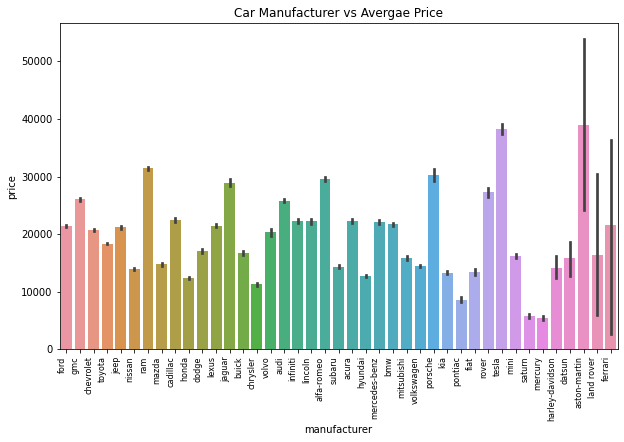

In [55]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='manufacturer', y='price', data=dataset);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8);
plt.title("Car Manufacturer vs Avergae Price");

**As we can see from the above chart, various manufactures have various prices of cars and the maximum average price is for Aston-Martin.**

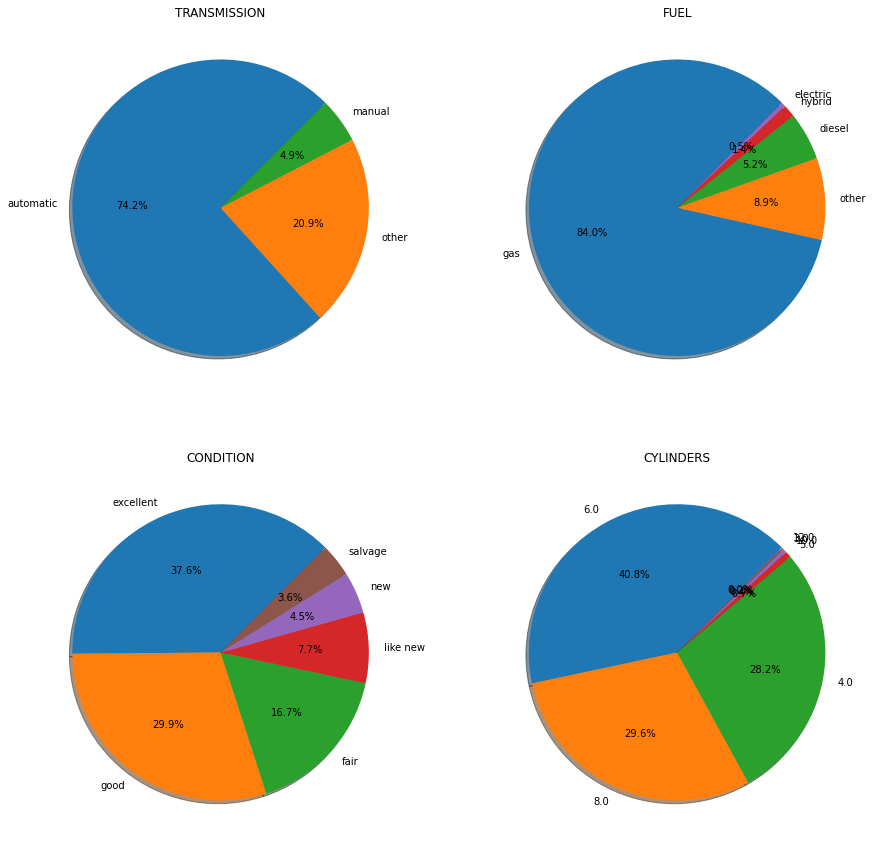

In [56]:
pie = ['transmission','fuel','condition','cylinders']

fig = plt.figure(figsize = (15,15))
axes = 220
for p in pie:
    axes += 1
    fig.add_subplot(axes)
    plt.pie(dataset[p].value_counts(), labels=dataset[p].unique(),autopct='%1.1f%%', shadow=True, startangle=45);
    plt.title(p.upper())
plt.show()

From the above pie charts we can conclude that

*   In the dataset there are 74.2% automatic cars, 20.9% other and 4.9% manual cars.
*   In the dataset there are 84.1% gas cars, 8.9% other and 5.2% diesel cars, 1.4% hydrid and 0.5% electric cars.


*   In the dataset there are  37.5% cars in excellent condition, 29.9% cars in good condition, 16.7% cars in fair condition, 7.8% cars in like new condition, 4.5% cars in new condition and 3.6% cars in salvage condition.
*   In the dataset there are  40.8% gas 6 cylinder cars, 29.8% 8 cylinder cars  and 28.2% 4 cylinder cars.

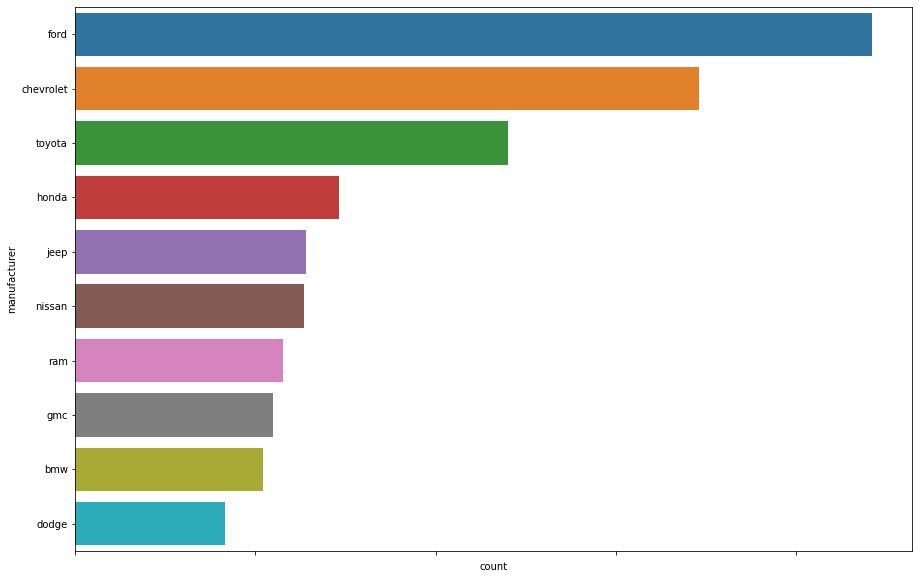

In [57]:
manufacturers_top10 = dataset['manufacturer'].value_counts().iloc[:10]
manufacturers = pd.DataFrame({'manufacturer': manufacturers_top10.index, 'count': manufacturers_top10.values})
plt.figure(figsize=(15,10))
ax = sns.barplot(y='manufacturer',x='count',data=manufacturers, order=manufacturers['manufacturer']);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=6);

**As from the above barchart we can conclude that highest ford cars are present in the dataset.**

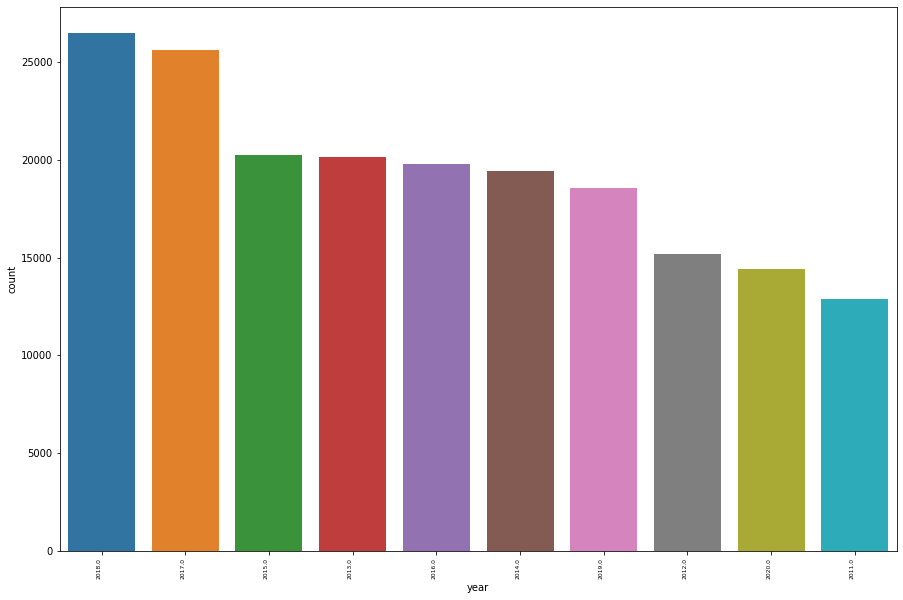

In [58]:
years_top10 = dataset['year'].value_counts().iloc[:10]
years = pd.DataFrame({'year': years_top10.index, 'count': years_top10.values})
plt.figure(figsize=(15,10))
ax = sns.barplot(x='year',y='count',data=years, order=years['year']);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=6);

**From the above barchart we can see that most of the cars are manufactured in 2018.**

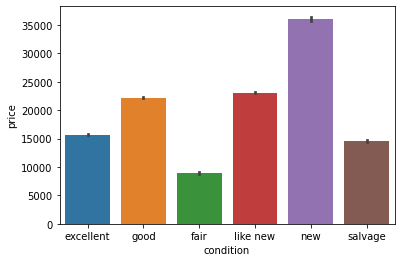

In [59]:
ax = sns.barplot(x="condition", y="price", data=dataset)

**As from the Barchart we can see that cars whose condition is new has higher price than compared to other condition cars.**

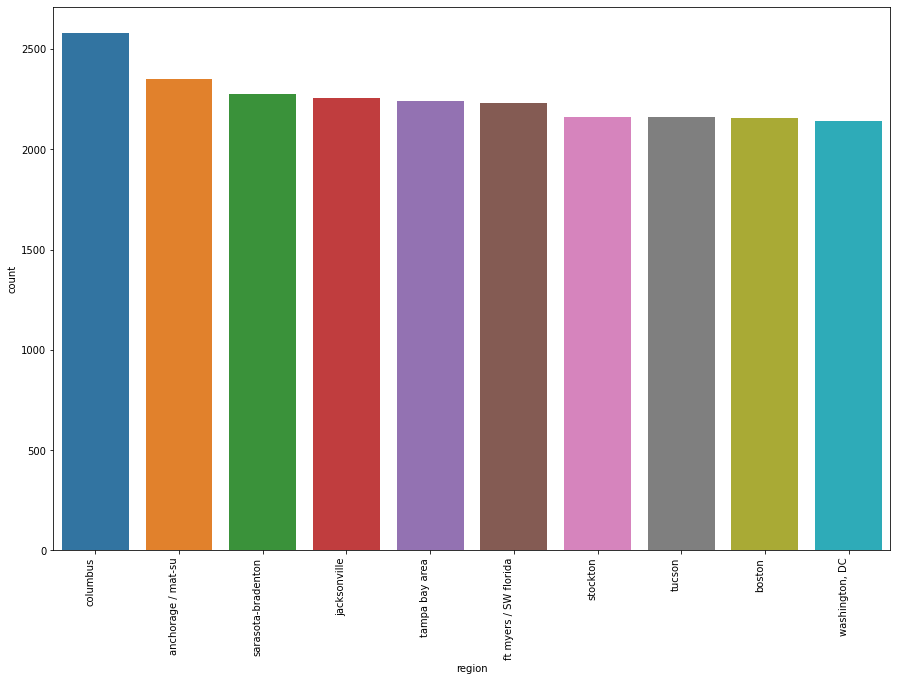

In [60]:
plt.figure(figsize=(15,10))

region_top10 = dataset['region'].value_counts().iloc[:10]
regions = pd.DataFrame({'region': region_top10.index, 'count': region_top10.values})

ax = sns.barplot(x='region',y='count',data=regions, order=regions['region']);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10);

**As from the above chart we can see that Columbus holds the first rank in having second-hand cars compared to other regions.**

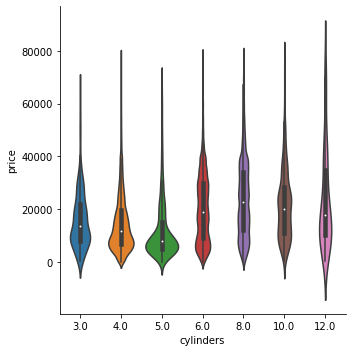

In [61]:
sns.catplot(x="cylinders", y="price",kind="violin", data=dataset)

**From the above graph we can see that various price difference compared to the different cylinder numbers.**

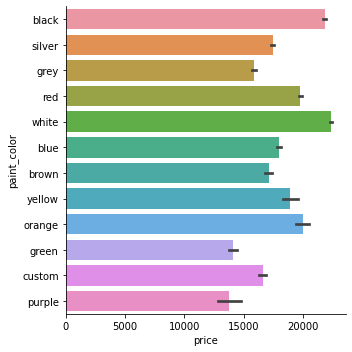

In [62]:
sns.catplot(y="paint_color", x="price",kind="bar", data=dataset);

**From the above graph we can see that white colour cars having the higest price in the dataset.**

###  **Build and Evaluate the Model**



 As machine can't uderstand the non-numeric value, we have to convert non-numeric value to the numeric values which we are doing with the help of lable encoder. 

In [63]:
labelEncoder = preprocessing.LabelEncoder()

In [64]:
dataset[['region','manufacturer', 'model', 'condition',
       'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state']]=dataset[['region','manufacturer', 'model', 'condition',
       'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state']].apply(labelEncoder.fit_transform)

In [65]:
y= dataset.price # setting the target variable
X= dataset.drop('price',axis=1)

**Divide the data into Train and Test**

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [67]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(218826, 16) (218826,)
(54707, 16) (54707,)


**Training the Model**

In [68]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

**Testing the trained model**

In [69]:
y_pred = regressor.predict(X_test)

**Performance of the model**

In [70]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print('Accuracy: ',regressor.score(X_test,y_test)*100)

Mean Absolute Error: 2318.05
Mean Squared Error: 20803096.23
Root Mean Squared Error: 4561.04
Accuracy:  88.87914737461668


**References:**


*   https://www.youtube.com/watch?v=4yI3vVe0Jos&ab_channel=KenJee
*   https://github.com/PlayingNumbers/fundamentals/blob/master/Data_Cleaning.py


*   https://www.kaggle.com/austinreese/craigslist-carstrucks-data/code?datasetId=62920&sortBy=voteCount

*   https://www.kaggle.com/austinreese/craigslist-carstrucks-data/code?datasetId=62920&sortBy=voteCount

*   https://www.kaggle.com/msagmj/data-cleaning-eda-used-cars-prediction-86
*   https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html


*   https://www.kaggle.com/austinreese/craigslist-carstrucks-data






